<a href="https://colab.research.google.com/github/kartheikiyer/dense_basis/blob/master/live_notebooks/Dense_Basis_Standalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# file handling packages
import os
from tempfile import mkstemp
from shutil import move
from os import fdopen, remove

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.8)
sns.set_style('white')

In [2]:
# install FSPS
os.chdir('/content/')
#!rm -r fsps # uncomment this if FSPS folder exists
!mkdir fsps
!cd fsps
!git clone https://github.com/cconroy20/fsps

def replace(file_path, pattern, subst):
    #Create temp file
    fh, abs_path = mkstemp()
    with fdopen(fh,'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    #Remove original file
    remove(file_path)
    #Move new file
    move(abs_path, file_path)
   
# add -fPIC flag to Makefile    
file_path = '/content/fsps/src/Makefile'
pattern = 'F90FLAGS = -O -cpp'
subst = 'F90FLAGS = -O -cpp -fPIC'

replace(file_path, pattern, subst)

!export SPS_HOME=/content/fsps/

os.chdir('/content/fsps/src')
os.listdir()
#!make clean
!make all

os.environ['SPS_HOME'] = "/content/fsps"

# clone and install python-fsps
os.chdir('/content/fsps')
!git clone https://github.com/dfm/python-fsps.git
    
os.chdir('/content/fsps/python-fsps')
os.listdir()
!python setup.py install --user

import fsps

Cloning into 'fsps'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 2605 (delta 8), reused 11 (delta 4), pack-reused 2583
Receiving objects: 100% (2605/2605), 346.99 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (1764/1764), done.
Checking out files: 100% (219/219), done.
gfortran -O3 -cpp -fPIC   sps_vars.f90 -c
gfortran -O3 -cpp -fPIC   sps_utils.f90 -c
gfortran -O3 -cpp -fPIC   -o simple.o -c simple.f90
gfortran -O3 -cpp -fPIC   -o compsp.o -c compsp.f90
gfortran -O3 -cpp -fPIC   -o csp_gen.o -c csp_gen.f90
gfortran -O3 -cpp -fPIC   -o ssp_gen.o -c ssp_gen.f90
gfortran -O3 -cpp -fPIC   -o getmags.o -c getmags.f90
gfortran -O3 -cpp -fPIC   -o locate.o -c locate.f90
gfortran -O3 -cpp -fPIC   -o funcint.o -c funcint.f90
gfortran -O3 -cpp -fPIC   -o sps_setup.o -c sps_setup.f90
gfortran -O3 -cpp -fPIC   -o pz_convol.o -c pz_convol.f90
gfortran -O3 -cpp -fPIC   -o get_tuniv.o -c get_t

In [3]:
!pip install corner
!pip install hickle
!pip install emcee
!pip install george

     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 51kB 2.3MB/s 
     |████████████████████████████████| 1.8MB 4.2MB/s 
     |████████████████████████████████| 194kB 35.5MB/s 
  ERROR: Failed building wheel for george
  Running setup.py clean for george
Failed to build george
    Running setup.py install for george ... done


In [4]:
os.chdir('/content/')
!git clone https://github.com/kartheikiyer/dense_basis.git
os.chdir('/content/dense_basis/')
# remove .pyc files from old compiles in case there are any
!find /content/dense_basis -name '*.pyc' -delete
!python setup.py install

Cloning into 'dense_basis'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 897 (delta 12), reused 23 (delta 6), pack-reused 859
Receiving objects: 100% (897/897), 289.03 MiB | 35.52 MiB/s, done.
Resolving deltas: 100% (351/351), done.
running install
running bdist_egg
running egg_info
writing dense_basis.egg-info/PKG-INFO
writing dependency_links to dense_basis.egg-info/dependency_links.txt
writing requirements to dense_basis.egg-info/requires.txt
writing top-level names to dense_basis.egg-info/top_level.txt
writing manifest file 'dense_basis.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying dense_basis/pre_grid.py -> build/lib/dense_basis
copying dense_basis/__init__.py -> build/lib/dense_basis
copying dense_basis/gp_sfh.py -> build/lib/dense_basis
copying dense_basis/mcmc.py -> build/lib/dense_basis
copying den

In [5]:
import dense_basis as db

Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.


In [6]:
print('running dense_basis version:',db.__version__)
print('---Dependency versions:---')
print('running hickle version:',db.hickle.__version__)
print('running george version:',db.george.__version__)
print('running corner version:',db.corner.__version__)
print('running emcee version:',db.emcee.__version__)
print('running python-fsps version:',db.fsps.__version__)

running dense_basis version: 0.1.5
---Dependency versions:---
running hickle version: 4.0.1
running george version: 0.3.1
running corner version: 2.1.0
running emcee version: 3.0.2
running python-fsps version: 0.3.0


# Now that dense_basis is up and running, let's run the tutorial.

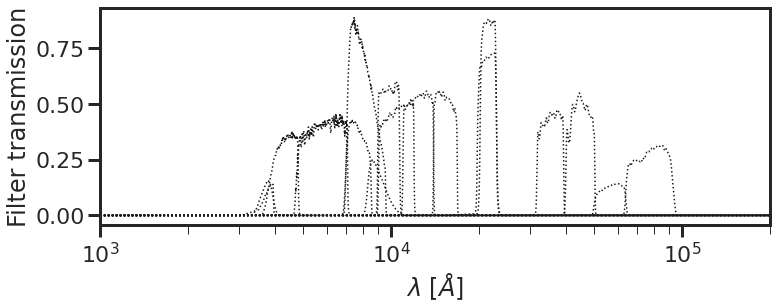

In [7]:
filter_list = 'filter_list_goodss.dat'
filt_dir = 'internal' # path to directory containing filter list
db.plot_filterset(filter_list = filter_list, filt_dir = filt_dir)

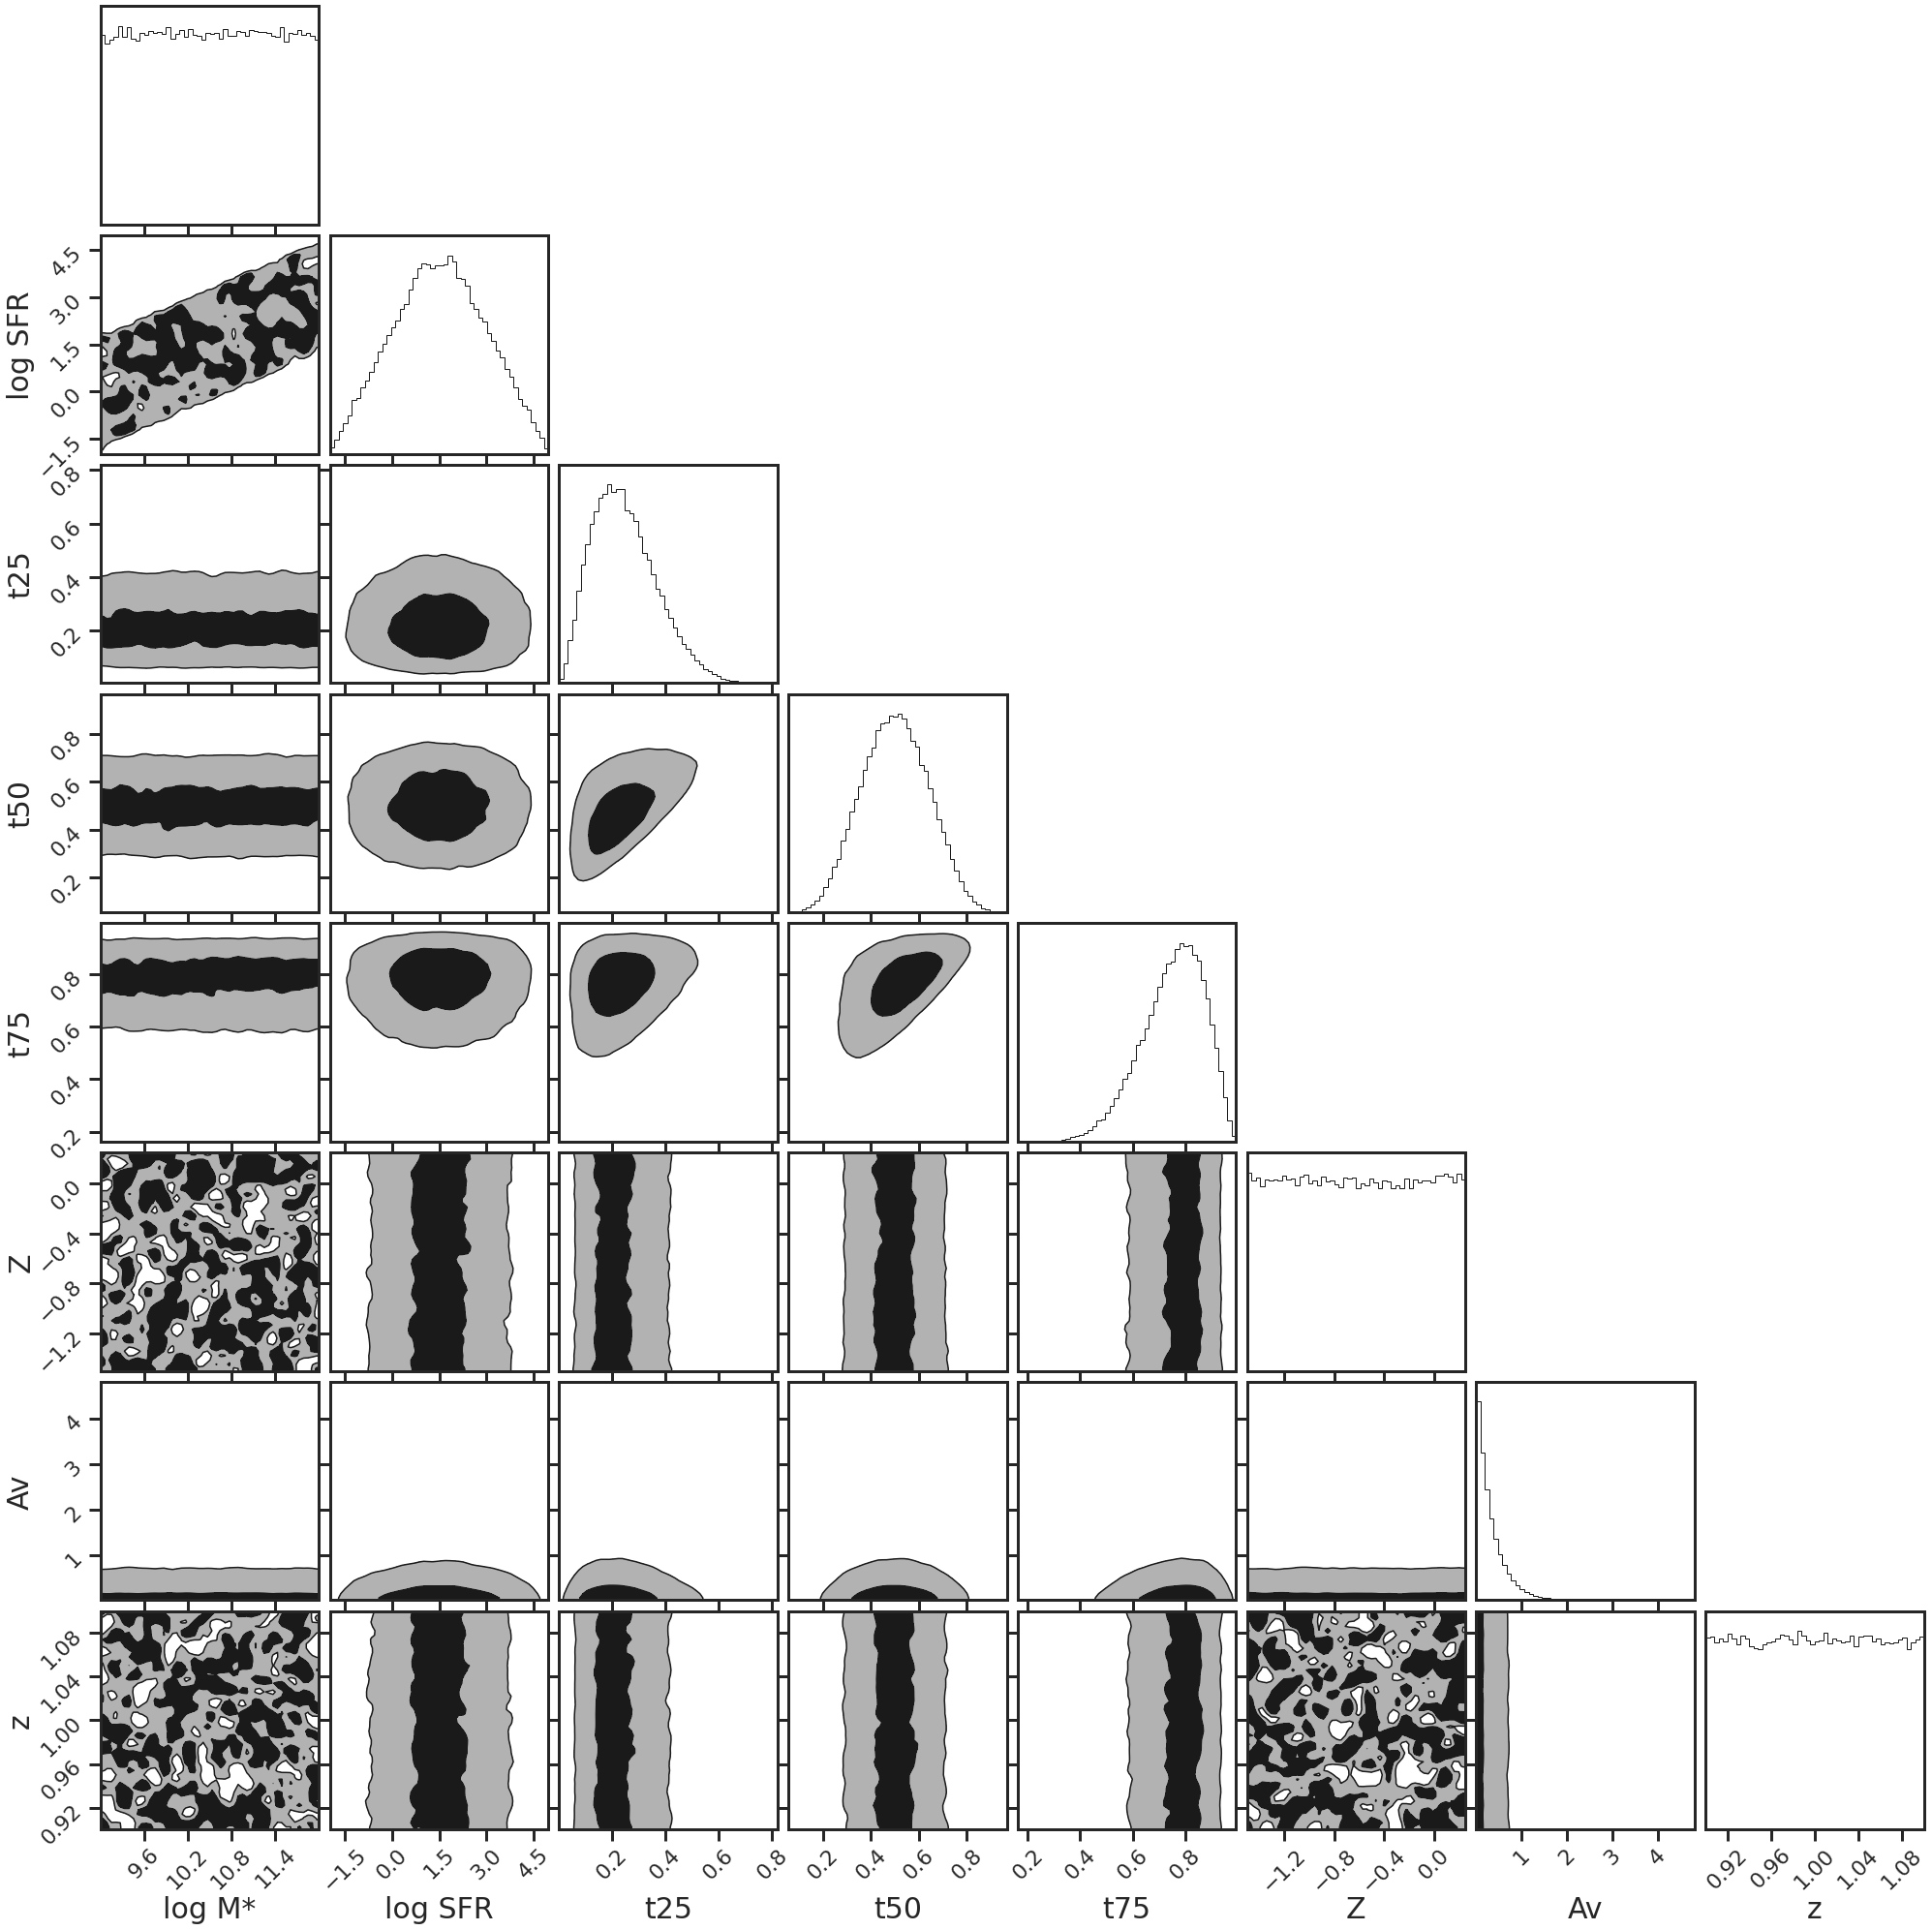

In [8]:
priors = db.Priors()
priors.tx_alpha = 3.0
priors.plot_prior_distributions()

In [23]:
fname = 'test_atlas'
N_pregrid = 10000
priors.Nparam = 3
path = 'pregrids/'
db.generate_atlas(N_pregrid = N_pregrid,
                  priors = priors,
                  fname = fname, store=True, path='pregrids/',
                  filter_list = filter_list, filt_dir = filt_dir)

  0%|          | 0/10000 [00:00<?, ?it/s]

generating atlas with: 
3  tx parameters,  sSFRflat  SFR sampling custom  SFH treatment flat  met sampling Calzetti  dust attenuation exp  dust prior False  SFR decoupling.



100%|██████████| 10000/10000 [19:42<00:00,  8.46it/s]


Path exists. Saved atlas at : pregrids/test_atlas_10000_Nparam_3.dbatlas
storing without compression


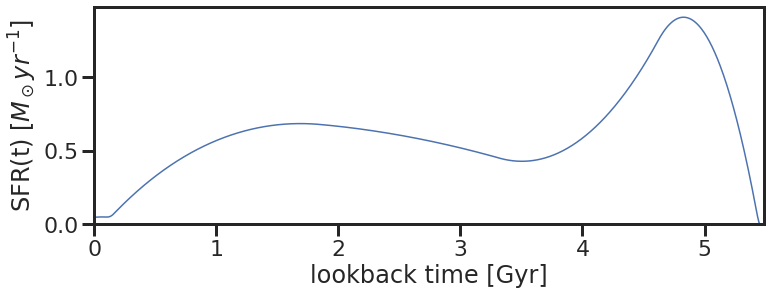

In [24]:
# sample from the prior space to get parameters
rand_sfh_tuple, rand_Z, rand_Av, rand_z = priors.sample_all_params(random_seed = 15)

# generate an SFH corresponding to the SFH-tuple and see how it looks:
rand_sfh, rand_time = db.tuple_to_sfh(rand_sfh_tuple, zval = rand_z)
fig = db.plot_sfh(rand_time, rand_sfh, lookback=True)
sfh_truths = [rand_time, rand_sfh]

# generate a corresponding spectrum and multiply by filter curves to get the SED:
_, sfr_true, mstar_true = db.make_spec(rand_sfh_tuple, rand_Z, rand_Av, rand_z, return_ms = True)
rand_spec, rand_lam = db.make_spec(rand_sfh_tuple, rand_Z, rand_Av, rand_z, return_lam = True)
obs_sed = db.calc_fnu_sed(rand_spec, rand_z, rand_lam, fkit_name = filter_list, filt_dir = filt_dir)
obs_err = obs_sed * 0.1 # S/N of 10
sed_truths = (mstar_true, sfr_true, rand_sfh_tuple[3:], rand_Z, rand_Av, rand_z)
sed_truths = np.hstack(sed_truths)

In [25]:
atlas = db.load_atlas(fname, N_pregrid = N_pregrid, N_param = priors.Nparam, path = path)

# pass the atlas and the observed SED into the fitter,
# evaluate_sed_likelihood returns the likelihood for each SED in the atlas and the norm value to
# best match the observed SED with the atlas.
chi2_array, norm_fac = db.evaluate_sed_likelihood(obs_sed, obs_err, atlas)

In [26]:
chi2_array, norm_fac = db.evaluate_sed_likelihood(obs_sed, obs_err, atlas)
fit_quantities = db.get_quants(chi2_array, atlas, norm_fac)

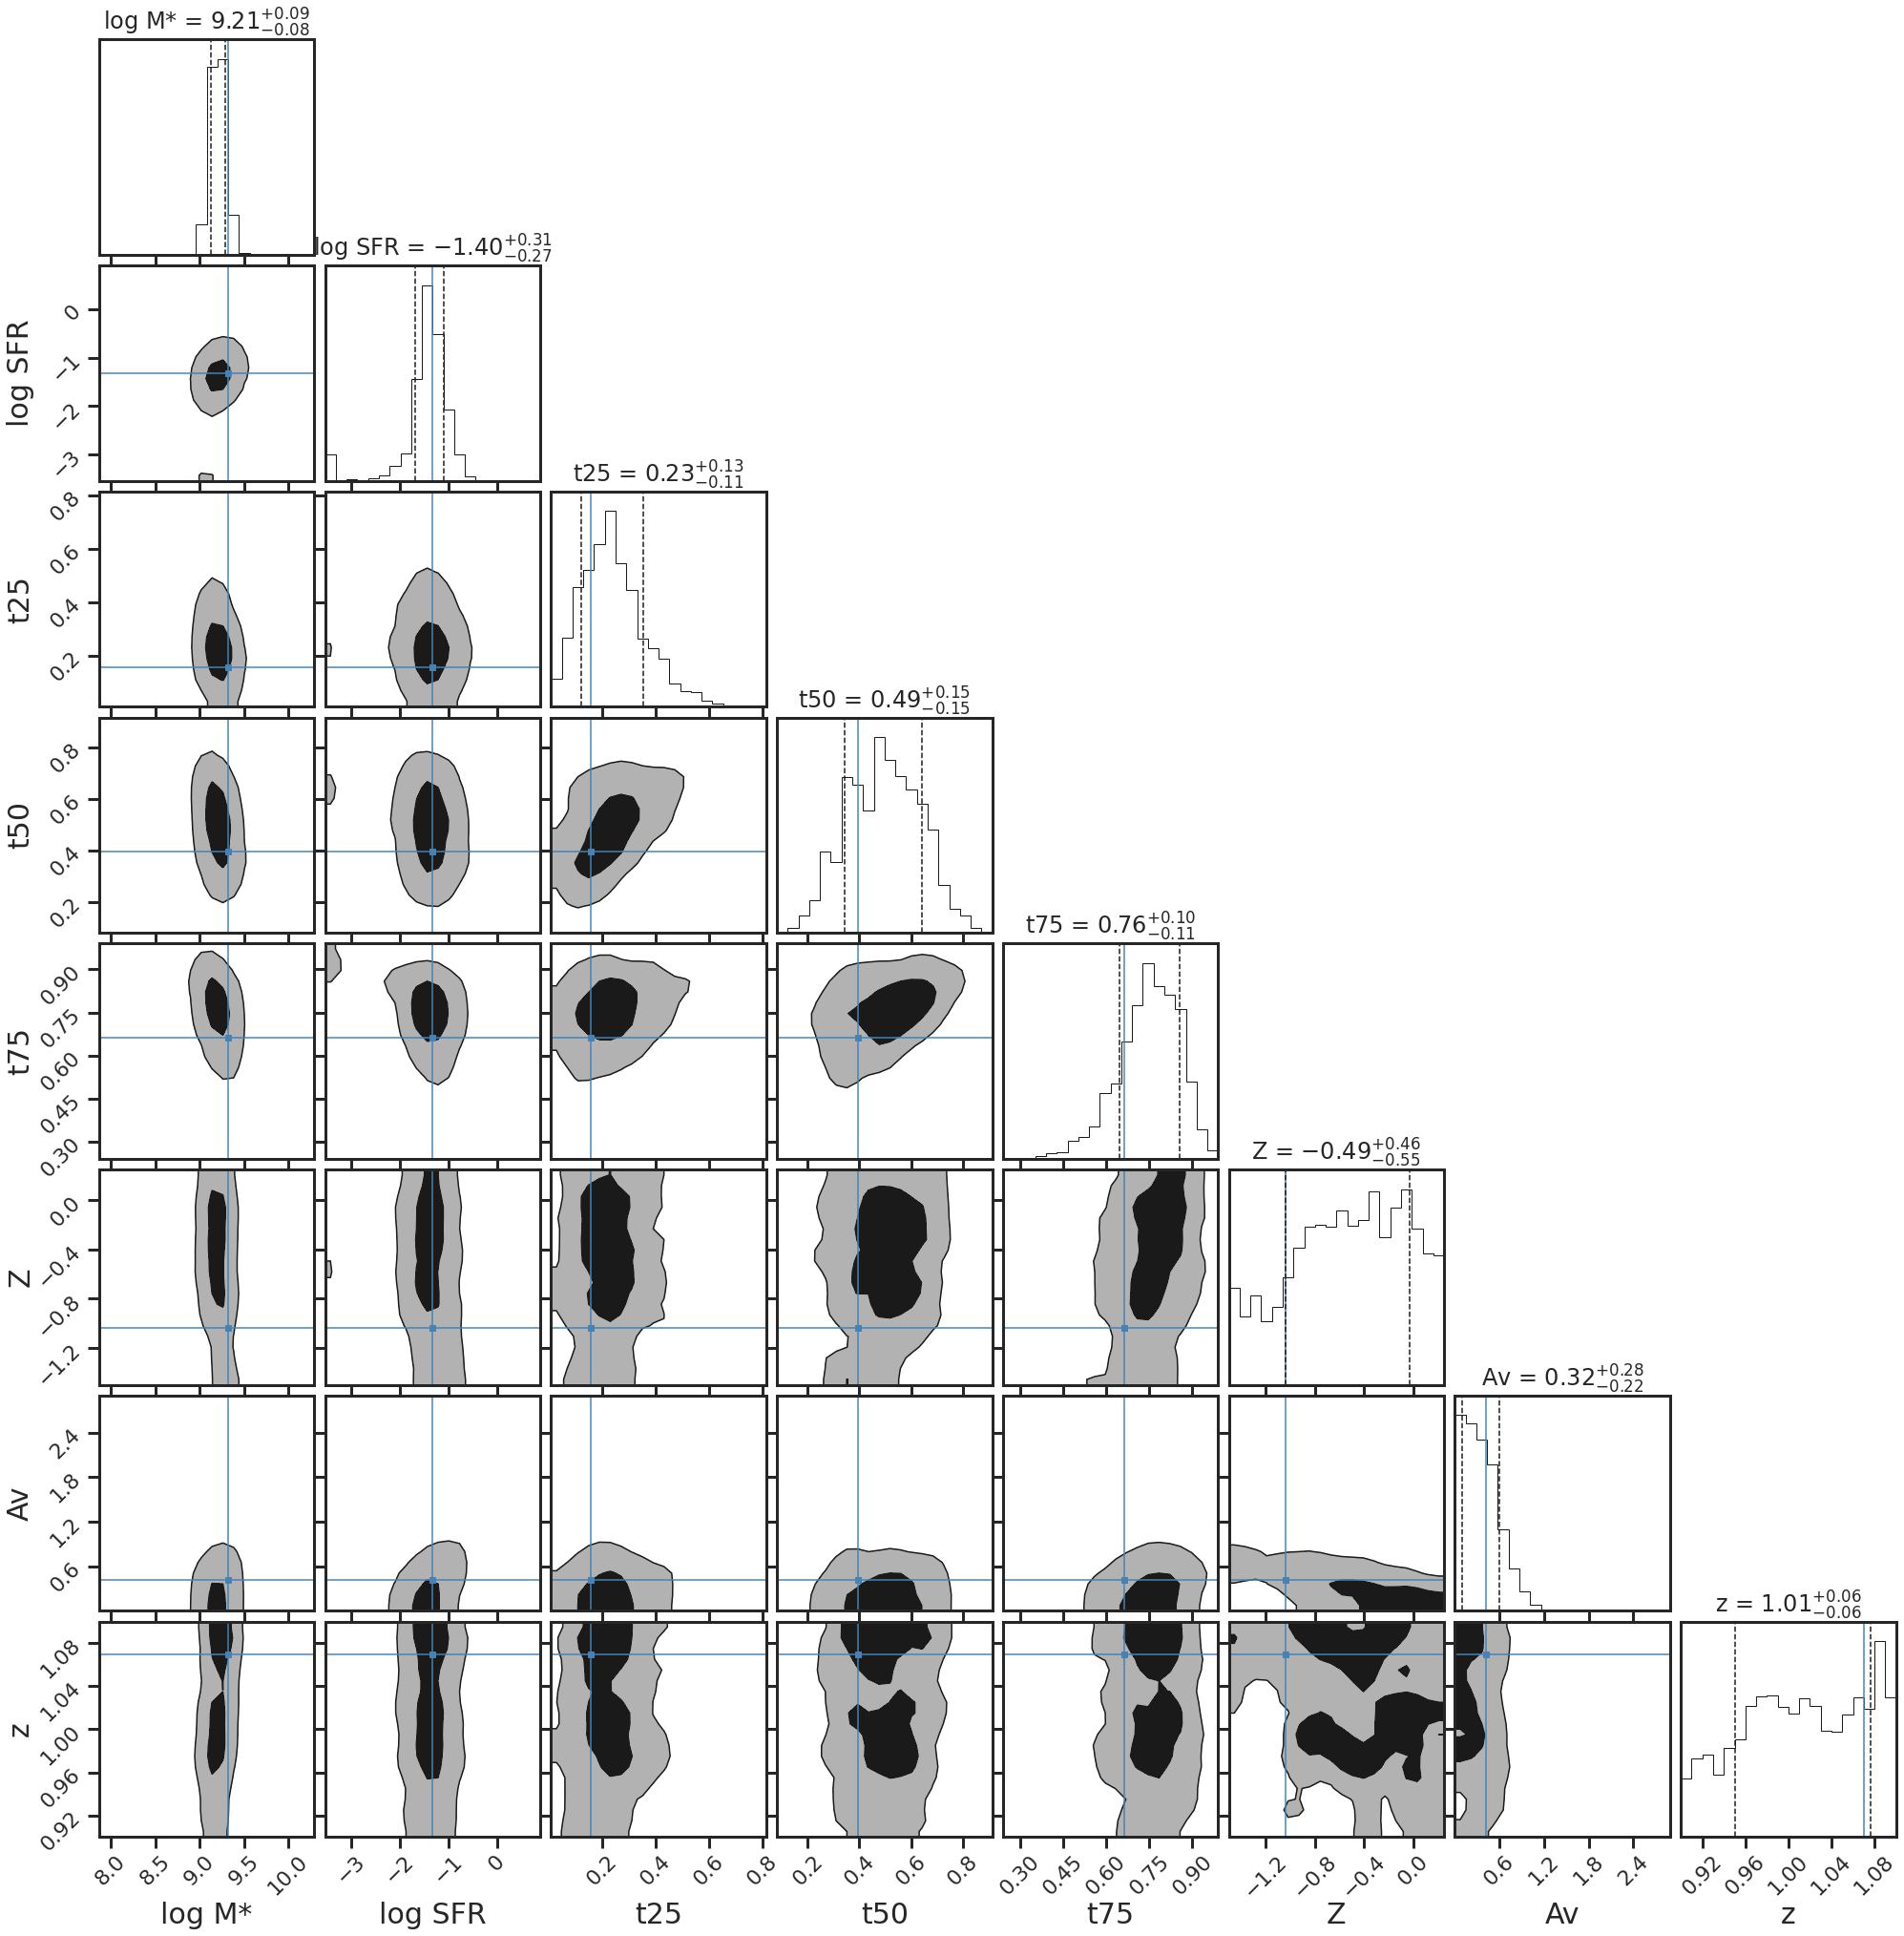

In [27]:
db.plot_posteriors(chi2_array, norm_fac, obs_sed, atlas,truths=sed_truths)

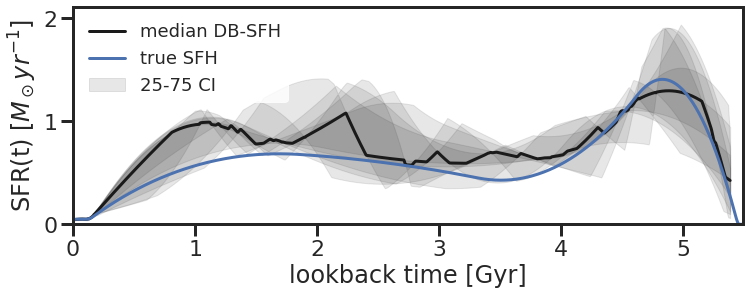

In [30]:
db.plot_SFH_posterior(chi2_array, norm_fac, obs_sed, atlas,
                         truths = sfh_truths, sfh_threshold = 0.9)

In [ ]:
sampler = db.run_emceesampler(obs_sed, obs_err, atlas, epochs=10000, plot_posteriors=True)

 77%|███████▋  | 7680/10000 [01:12<00:23, 100.02it/s]